In [1]:
###导入所需要的库
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    make_scorer, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from xgboost import XGBClassifier
import lightgbm as lgb

train_data  = pd.read_parquet('/Users/xiaohehe/Desktop/hkust/24-25fall/fintech/project1/final_data/train_data_flit.parquet')
train_data 

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,pos_cash_completed_contracts,external_sources_mean,SK_ID_CURR_mean_instalment_paid_late_last_5,SK_ID_CURR_max_instalment_paid_late_last_5,CNT_FAM_MEMBERS,credit_to_goods_ratio,credit_to_annuity_ratio,phone_to_employ_ratio,...,DAYS_EMPLOYED_x,REGION_POPULATION_RELATIVE,CODE_GENDER_NAME_EDUCATION_TYPE_max_OWN_CAR_AGE,children_ratio,CODE_GENDER_REG_CITY_NOT_WORK_CITY_mean_CNT_CHILDREN_abs_diff,bureau_overdue_debt_ratio,bureau_credit_active_binary,EMERGENCYSTATE_MODE_XNA,previous_application_fraction_of_refused_applications,TARGET
0,2.000000,2.000000,0.000000,0.161787,0.000000,0.000000,1.000000,1.158397,16.461104,1.780220,...,-637,0.018801,91.00000,0.000000,0.442195,0.000000,2.000000,0.0,0.000000,1
1,1.000000,0.000000,2.000000,0.466757,0.000000,0.000000,2.000000,1.145199,36.234085,0.696970,...,-1188,0.003541,65.00000,0.000000,0.365735,91.000000,1.000000,0.0,0.000000,0
2,0.000000,0.000000,1.000000,0.642739,0.000000,0.000000,1.000000,1.000000,20.000000,3.622222,...,-225,0.010032,91.00000,0.000000,0.442195,91.000000,0.000000,1.0,0.000000,0
3,2.000000,0.000000,2.000000,0.650442,0.000000,0.000000,2.000000,1.052803,10.532818,0.203027,...,-3039,0.008019,65.00000,0.000000,0.365735,91.000000,2.078219,1.0,0.111111,0
4,0.000000,0.000000,3.000000,0.322738,0.000000,0.000000,1.000000,1.000000,23.461618,0.364055,...,-3038,0.028663,91.00000,0.000000,0.514099,91.000000,0.000000,1.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565367,1.401895,0.000000,0.799729,0.442642,0.319892,0.799729,3.000000,1.369532,20.807239,0.848098,...,-683,0.025968,85.79296,0.599910,1.344553,18.224638,1.215936,1.0,0.000000,1
565368,0.752439,0.000000,1.247561,0.463903,0.398049,1.000000,3.504878,1.158271,34.235456,441.761481,...,87869,0.008252,65.00000,0.376220,1.320227,0.000000,4.257317,1.0,0.000000,1
565369,0.000000,0.000000,2.398248,0.510719,0.000000,0.000000,2.699124,1.047659,19.246774,0.987711,...,-1915,0.026131,65.00000,0.233041,0.553471,63.620277,1.753809,1.0,0.162490,1
565370,0.543924,0.543924,3.087848,0.264071,0.217570,0.543924,1.456076,1.165803,13.756022,0.353888,...,-4958,0.012839,65.00000,0.000000,0.365735,0.000000,4.456076,1.0,0.184797,1


In [3]:
train_data = train_data[train_data['TARGET']!=2]

# 挑选一部分数据

# Model Constuction

In [2]:
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import (
    make_scorer, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from xgboost import XGBClassifier
import lightgbm as lgb

In [3]:
X = train_data.drop(columns=['TARGET'])
y = train_data['TARGET']

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),  
    'recall': make_scorer(recall_score),  
    'f1': make_scorer(f1_score)  
}

# Logistic Regression

In [4]:
classifier = LogisticRegression(random_state=42)

accuracy_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['accuracy'])
precision_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['precision'])
recall_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['recall'])
f1_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['f1'])

/opt/anaconda3/envs/galaxy/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/galaxy/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [5]:
print("Accuracy Mean:", accuracy_scores.mean())
print("Precision Mean:", precision_scores.mean())
print("Recall Mean:", recall_scores.mean())
print("F1 Mean:", f1_scores.mean())


Accuracy Mean: 0.603867902189989
Precision Mean: 0.5995923732064166
Recall Mean: 0.6252697685414711
F1 Mean: 0.6121437173404713


In [6]:
y_predlog = cross_val_predict(classifier, X, y, cv=5)
y_scorelog = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')

conf_matrix = confusion_matrix(y, y_predlog)


print("Confusion Matrix:")
print(conf_matrix)

/opt/anaconda3/envs/galaxy/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/galaxy/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Confusion Matrix:
[[164655 118031]
 [105931 176755]]


/opt/anaconda3/envs/galaxy/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


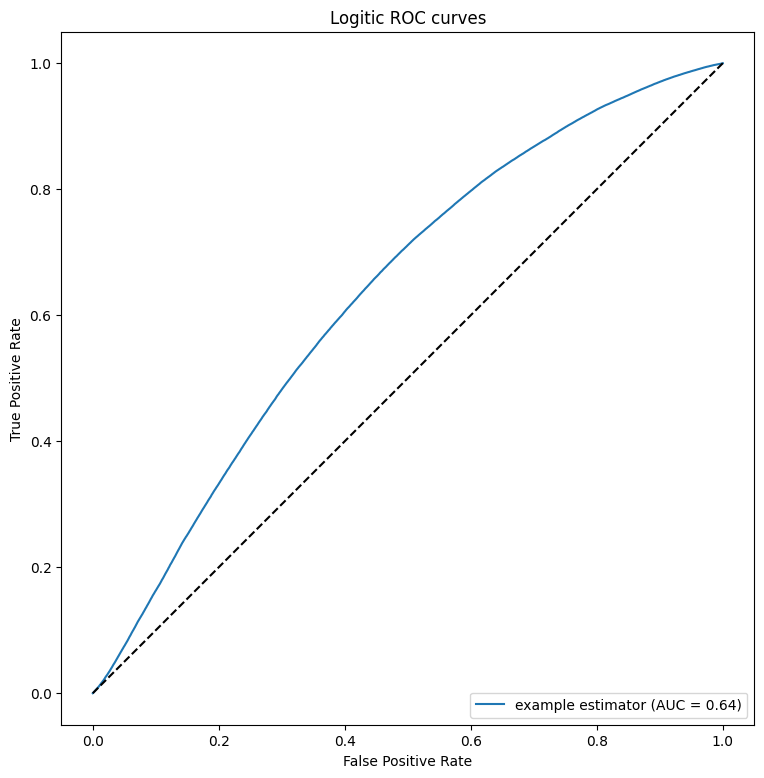

In [7]:
plt.rc('figure',figsize=(18,9))
fpr, tpr, thresholds = metrics.roc_curve(y,y_scorelog[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logitic ROC curves")
plt.show()

# SVC

In [11]:
classifier = SVC(random_state=42, probability = True)
accuracy_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['accuracy'])
precision_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['precision'])
recall_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['recall'])
f1_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['f1'])

In [17]:
print("Accuracy Mean:", accuracy_scores.mean())
print("Precision Mean:", precision_scores.mean())
print("Recall Mean:", recall_scores.mean())
print("F1 Mean:", f1_scores.mean())

y_predsvc = cross_val_predict(classifier, X, y, cv=5)
y_scoresvc = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')

conf_matrix = confusion_matrix(y, y_predsvc)


print("Confusion Matrix:")
print(conf_matrix)

Accuracy Mean: 0.9309346733668342
Precision Mean: 0.0
Recall Mean: 0.0
F1 Mean: 0.0
Confusion Matrix:
[[930   0]
 [ 69   0]]


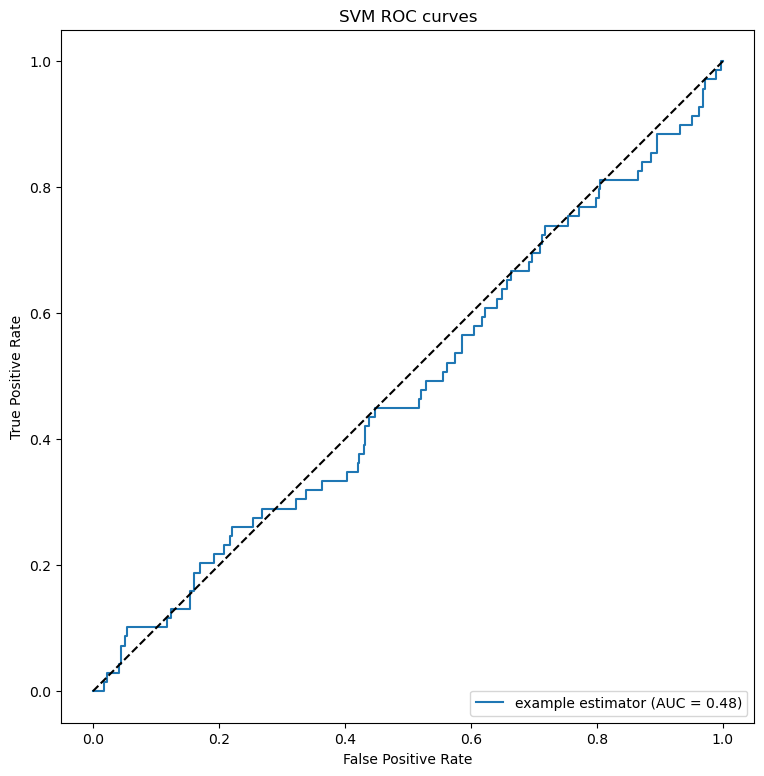

In [18]:
plt.rc('figure',figsize=(18,9))
fpr, tpr, thresholds = metrics.roc_curve(y,y_scoresvc[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC curves")
plt.show()

# KNN

In [19]:
classifier = KNeighborsClassifier(n_neighbors=3)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=FutureWarning)
    accuracy_scores = cross_val_score(classifier, X, y, cv=cv, scoring=scoring['accuracy'])
    precision_scores = cross_val_score(classifier, X, y, cv=cv, scoring=scoring['precision'])
    recall_scores = cross_val_score(classifier, X, y, cv=cv,scoring=scoring['recall'])
    f1_scores = cross_val_score(classifier, X, y, cv=cv, scoring=scoring['f1'])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
print("Accuracy Mean:", accuracy_scores.mean())
print("Precision Mean:", precision_scores.mean())
print("Recall Mean:", recall_scores.mean())
print("F1 Mean:", f1_scores.mean())

y_predknn = cross_val_predict(classifier, X, y, cv=5)
y_scoreknn = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')

conf_matrix = confusion_matrix(y, y_predknn)


print("Confusion Matrix:")
print(conf_matrix)

Accuracy Mean: 0.9229346733668342
Precision Mean: 0.0
Recall Mean: 0.0
F1 Mean: 0.0
Confusion Matrix:
[[919  11]
 [ 69   0]]


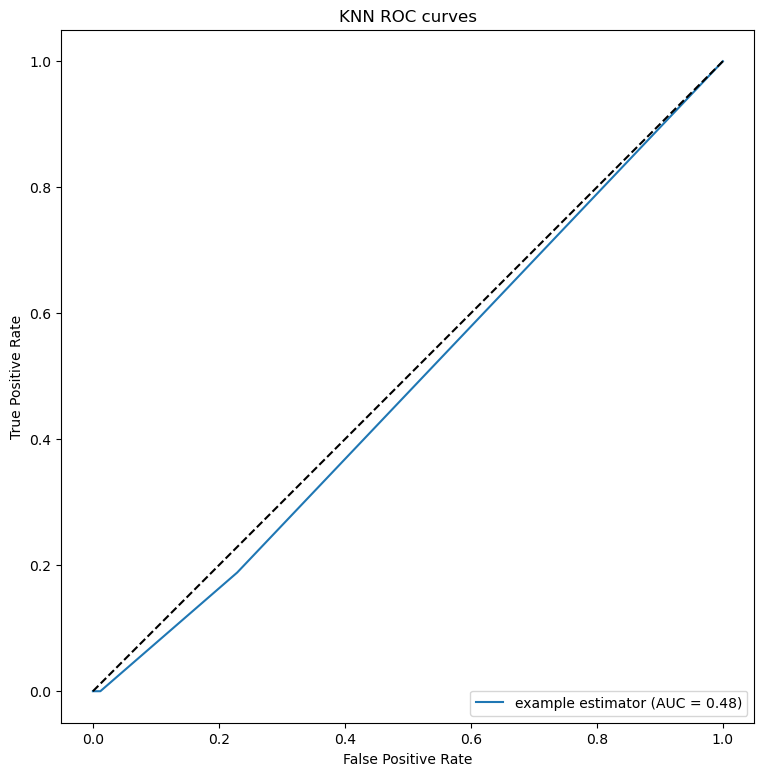

In [21]:
plt.rc('figure',figsize=(18,9))
fpr, tpr, thresholds = metrics.roc_curve(y,y_scoreknn[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC curves")
plt.show()

# Gaussian NB

In [22]:
classifier = GaussianNB()
accuracy_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['accuracy'])
precision_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['precision'])
recall_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['recall'])
f1_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['f1'])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
print("Accuracy Mean:", accuracy_scores.mean())
print("Precision Mean:", precision_scores.mean())
print("Recall Mean:", recall_scores.mean())
print("F1 Mean:", f1_scores.mean())

y_predgauss = cross_val_predict(classifier, X, y, cv=5)
y_scoregauss = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')

conf_matrix = confusion_matrix(y, y_predgauss)


print("Confusion Matrix:")
print(conf_matrix)

Accuracy Mean: 0.9249346733668341
Precision Mean: 0.0
Recall Mean: 0.0
F1 Mean: 0.0
Confusion Matrix:
[[924   6]
 [ 69   0]]


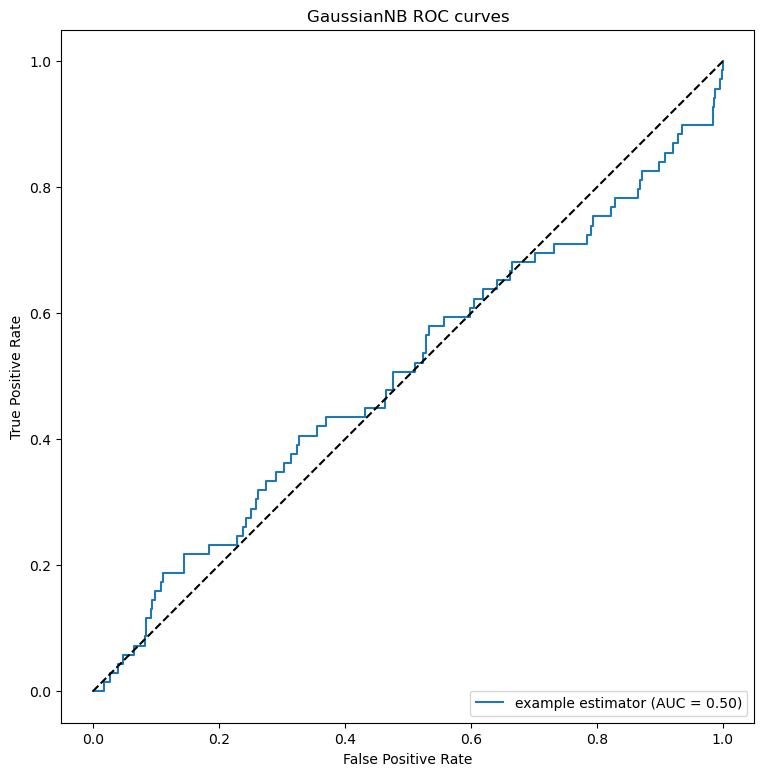

In [24]:
plt.rc('figure',figsize=(18,9))
fpr, tpr, thresholds = metrics.roc_curve(y,y_scoregauss[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("GaussianNB ROC curves")
plt.show()

# LDA

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.model_selection import cross_val_score, cross_val_predict
#LDA
classifier = LinearDiscriminantAnalysis()
accuracy_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['accuracy'])
precision_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['precision'])
recall_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['recall'])
f1_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['f1'])

In [14]:
print("Accuracy Mean:", accuracy_scores.mean())
print("Precision Mean:", precision_scores.mean())
print("Recall Mean:", recall_scores.mean())
print("F1 Mean:", f1_scores.mean())

y_predgauss = cross_val_predict(classifier, X, y, cv=5)
y_scoregauss = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')

conf_matrix = confusion_matrix(y, y_predgauss)


print("Confusion Matrix:")
print(conf_matrix)

Accuracy Mean: 0.8918994974874372
Precision Mean: 0.12303030303030302
Recall Mean: 0.09999999999999999
F1 Mean: 0.10958620689655171
Confusion Matrix:
[[884  46]
 [ 62   7]]


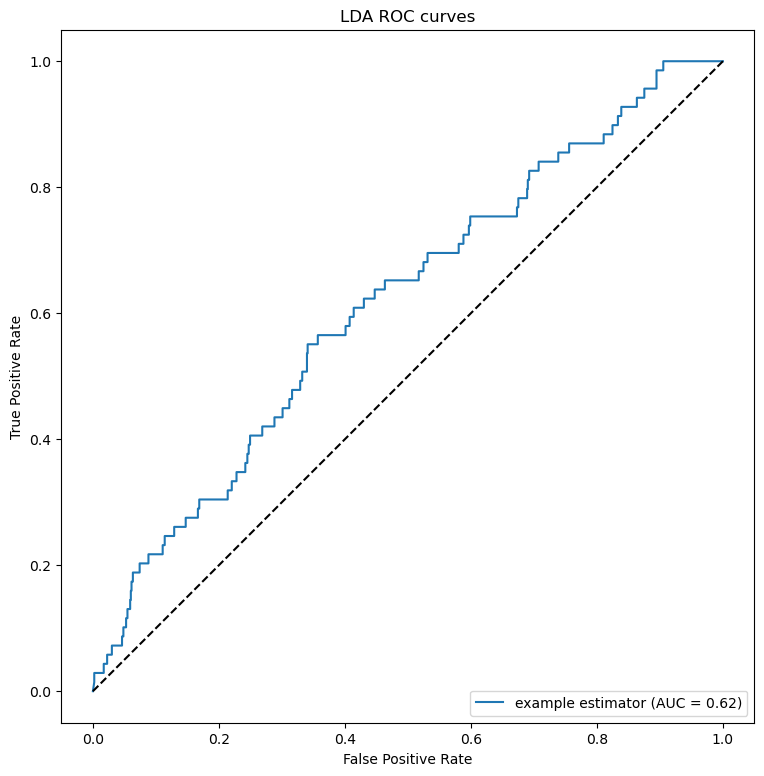

In [15]:
plt.rc('figure',figsize=(18,9))
fpr, tpr, thresholds = metrics.roc_curve(y,y_scoregauss[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LDA ROC curves")
plt.show()

# QDA

In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 使用QDA模型
classifier = QuadraticDiscriminantAnalysis()
accuracy_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['accuracy'])
precision_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['precision'])
recall_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['recall'])
f1_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['f1'])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.1

In [17]:
print("Accuracy Mean:", accuracy_scores.mean())
print("Precision Mean:", precision_scores.mean())
print("Recall Mean:", recall_scores.mean())
print("F1 Mean:", f1_scores.mean())

y_predgauss = cross_val_predict(classifier, X, y, cv=5)
y_scoregauss = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')

conf_matrix = confusion_matrix(y, y_predgauss)


print("Confusion Matrix:")
print(conf_matrix)

Accuracy Mean: 0.9189346733668342
Precision Mean: 0.1
Recall Mean: 0.015384615384615385
F1 Mean: 0.026666666666666665


/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.1

Confusion Matrix:
[[917  13]
 [ 68   1]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


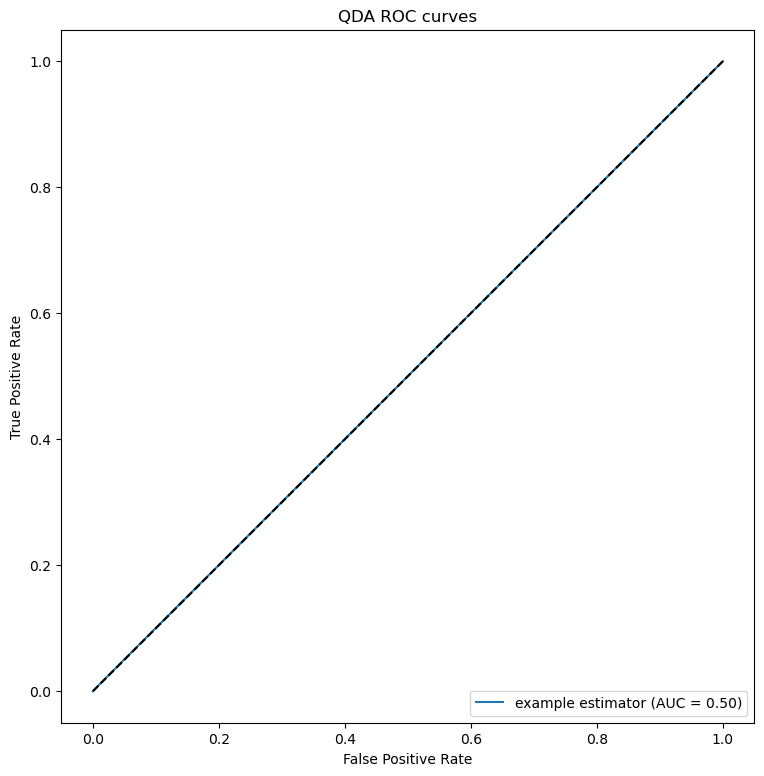

In [18]:
plt.rc('figure',figsize=(18,9))
fpr, tpr, thresholds = metrics.roc_curve(y,y_scoregauss[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("QDA ROC curves")
plt.show()

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

# 使用随机森林分类器
classifier = RandomForestClassifier(random_state=42)
accuracy_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['accuracy'])
precision_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['precision'])
recall_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['recall'])
f1_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['f1'])


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_

In [27]:
print("Accuracy Mean:", accuracy_scores.mean())
print("Precision Mean:", precision_scores.mean())
print("Recall Mean:", recall_scores.mean())
print("F1 Mean:", f1_scores.mean())

y_predgauss = cross_val_predict(classifier, X, y, cv=5)
y_scoregauss = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')

conf_matrix = confusion_matrix(y, y_predgauss)


print("Confusion Matrix:")
print(conf_matrix)

Accuracy Mean: 0.9309346733668342
Precision Mean: 0.0
Recall Mean: 0.0
F1 Mean: 0.0
Confusion Matrix:
[[930   0]
 [ 69   0]]


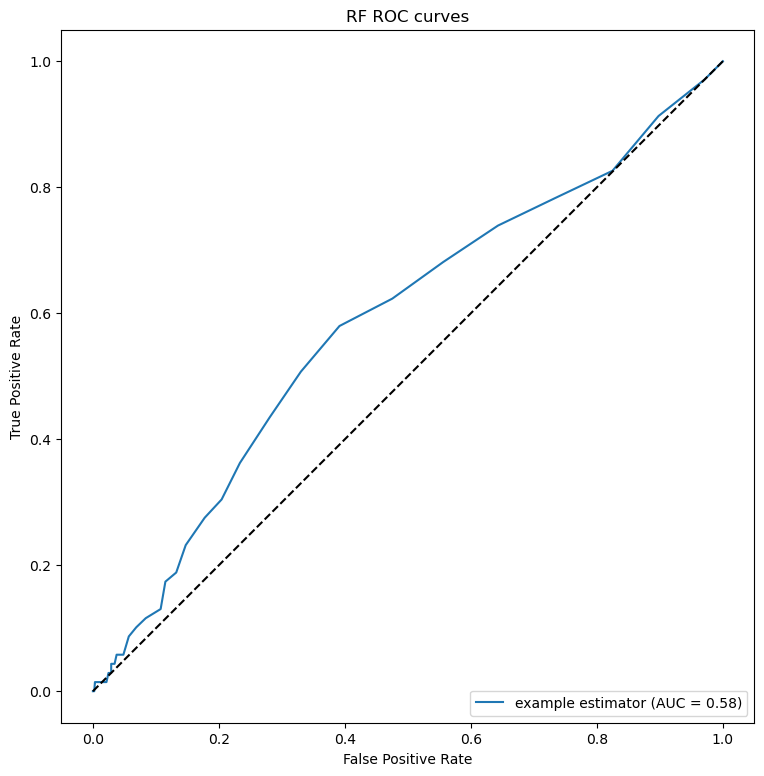

In [28]:
plt.rc('figure',figsize=(18,9))
fpr, tpr, thresholds = metrics.roc_curve(y,y_scoregauss[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RF ROC curves")
plt.show()

# XGBoost

In [51]:


classifier = XGBClassifier(random_state=42,eta = 0.01, gamma = 1, device = "cuda",max_depth = 2, subsample = 1,
                                    alpha = 1)

accuracy_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['accuracy'])
precision_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['precision'])
recall_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['recall'])
f1_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['f1'])

/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/hom

In [67]:
# 输出得分均值
print("Accuracy Mean:", accuracy_scores.mean())
print("Precision Mean:", precision_scores.mean())
print("Recall Mean:", recall_scores.mean())
print("F1 Mean:", f1_scores.mean())

y_pred_xgboost = cross_val_predict(classifier, X, y, cv=5)
y_score_xgboost = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')

conf_matrix = confusion_matrix(y, y_pred_xgboost)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy Mean: 0.9309346733668342
Precision Mean: 0.0
Recall Mean: 0.0
F1 Mean: 0.8276355205217856


/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "alp" } are not used.

  warnings.warn(smsg, UserWarning)
/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "alp" } are not used.

  warnings.warn(smsg, UserWarning)
/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "alp" } are not used.

  warnings.warn(smsg, UserWarning)
/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:28:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "alp" } are not used.

  warnings.warn(smsg, UserWarning)
/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [21:28:56] WARNING:

Confusion Matrix:
[[930   0]
 [ 69   0]]


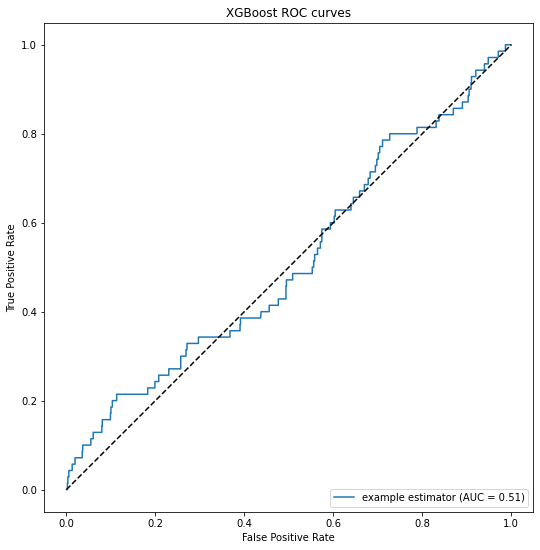

In [33]:
plt.rc('figure',figsize=(18,9))
fpr, tpr, thresholds = metrics.roc_curve(y,y_score_xgboost[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC curves")
plt.show()

# LightGBM

In [80]:
# classifier = lgb.LGBMClassifier(random_state=42, verbosity=-1)# 关闭日志输出
classifier = lgb.LGBMClassifier(random_state=42,verbosity=-1)
                                # ,learning_rate = 0.01, max_depth = 3, 
                                #         num_leaves = 10, min_data_in_leaf = 1,feature_fraction = 1,
                                #         bagging_fraction = 1, bagging_freq = 1, lambda_l1 = 1,
                                #         lambda_l2 = 1, min_gain_to_split = 1, n_estimators = 100)

accuracy_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['accuracy'])
precision_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['precision'])
recall_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['recall'])
f1_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['f1'])

[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.
[LightGBM] [Fatal] Do not support special JSON characters in feature name.


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/lightgbm/sklearn.py", line 1187, in fit
    super().fit(
  File "/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/lightgbm/sklearn.py", line 885, in fit
    self._Booster = train(
                    ^^^^^^
  File "/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/lightgbm/engine.py", line 255, in train
    booster = Booster(params=params, train_set=train_set)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/lightgbm/basic.py", line 3433, in __init__
    train_set.construct()
  File "/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/lightgbm/basic.py", line 2462, in construct
    self._lazy_init(data=self.data, label=self.label, reference=None,
  File "/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/lightgbm/basic.py", line 2123, in _lazy_init
    return self.set_feature_name(feature_name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/lightgbm/basic.py", line 2863, in set_feature_name
    _safe_call(_LIB.LGBM_DatasetSetFeatureNames(
  File "/home/cheam/anaconda3/envs/galaxy/lib/python3.11/site-packages/lightgbm/basic.py", line 263, in _safe_call
    raise LightGBMError(_LIB.LGBM_GetLastError().decode('utf-8'))
lightgbm.basic.LightGBMError: Do not support special JSON characters in feature name.


In [43]:
# 输出得分均值
print("Accuracy Mean:", accuracy_scores.mean())
print("Precision Mean:", precision_scores.mean())
print("Recall Mean:", recall_scores.mean())
print("F1 Mean:", f1_scores.mean())

y_pred_lightgbm = cross_val_predict(classifier, X, y, cv=5)
y_score_lightgbm = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')

conf_matrix = confusion_matrix(y, y_pred_lightgbm)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy Mean: 0.921
Precision Mean: 0.8722395640587688
Recall Mean: 0.921
F1 Mean: 0.8946907093414065
Confusion Matrix:
[[919  11]
 [ 68   2]]


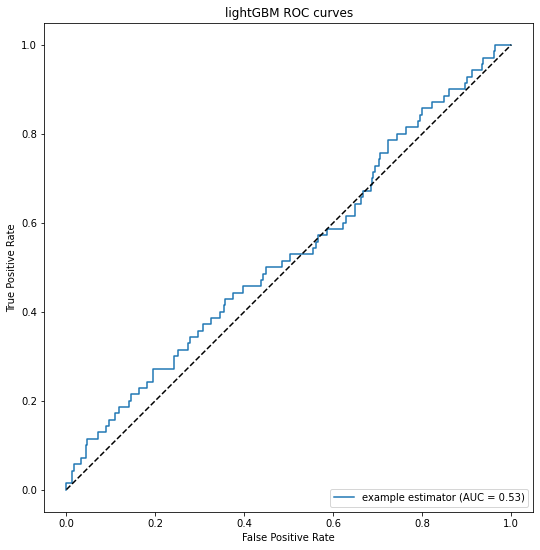

In [44]:
plt.rc('figure',figsize=(18,9))
fpr, tpr, thresholds = metrics.roc_curve(y,y_score_lightgbm[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("lightGBM ROC curves")
plt.show()

# Catboost

In [81]:
classifier = CatBoostClassifier(random_state=42, verbose=0)  # verbose=0 表示不打印训练过程
model = CatBoostClassifier(
    #iterations=1000,
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=3,
    #loss_function='Logloss',
    #eval_metric='AUC',
    random_seed=42,
    #verbose=100
)

accuracy_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['accuracy'])
precision_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['precision'])
recall_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['recall'])
f1_scores = cross_val_score(classifier, X, y, cv=5, scoring=scoring['f1'])

In [84]:
# 输出得分均值
print("Accuracy Mean:", accuracy_scores.mean())
print("Precision Mean:", precision_scores.mean())
print("Recall Mean:", recall_scores.mean())
print("F1 Mean:", f1_scores.mean())

y_pred_cat = cross_val_predict(classifier, X, y, cv=5)
y_score_cat = cross_val_predict(classifier, X, y, cv=5, method='predict_proba')

conf_matrix = confusion_matrix(y, y_pred_cat)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy Mean: 0.9523784855617512
Precision Mean: 0.9932705219407698
Recall Mean: 0.9115391309291784
F1 Mean: 0.9400325283734198


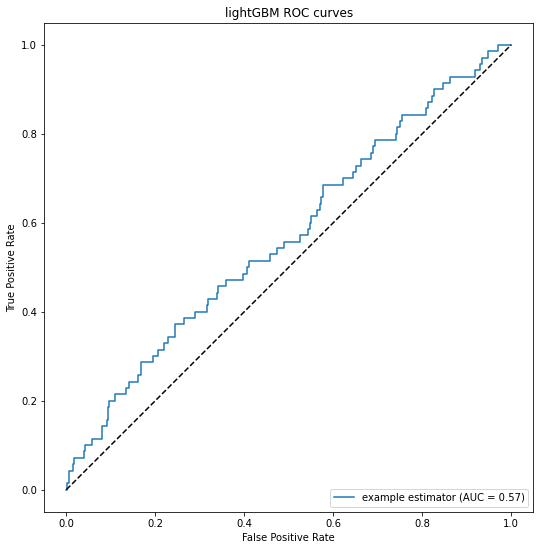

In [50]:
plt.rc('figure',figsize=(18,9))
fpr, tpr, thresholds = metrics.roc_curve(y,y_score_cat[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                 estimator_name='example estimator')
display.plot()
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("lightGBM ROC curves")
plt.show()

In [ ]:
# LDA